Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Loading the Datasets

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

train = pd.read_csv(r'/home/Intro_AI/Project/input/sign_mnist_train.csv')
test = pd.read_csv(r'/home/Intro_AI/Project/input/sign_mnist_test.csv')

print('Number of training samples:', len(train))
print('Number of testing samples:', len(test))

#Ensure we are correctly loading the labeled dataset
train.head()


Number of training samples: 27455
Number of testing samples: 7172


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [22]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


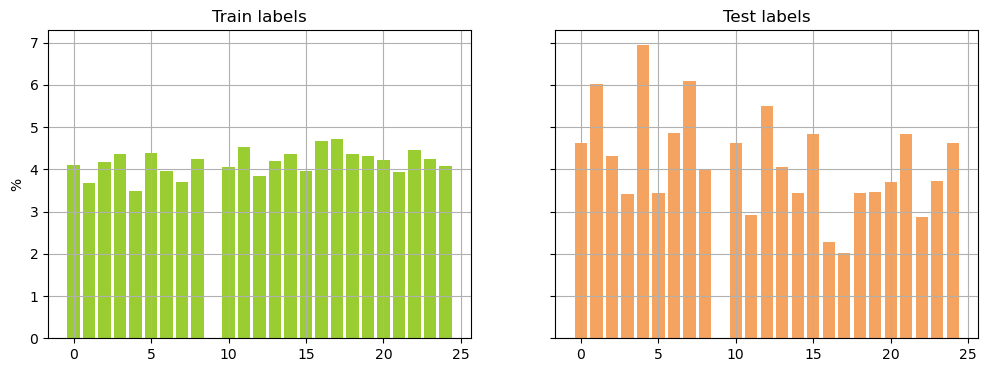

Number of image pixel: 784
Quadratic image size: 28
Number of labels: 24


In [23]:
labels = list(train['label'].value_counts().keys().sort_values())

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
axs[0].bar(labels, 100*train['label'].value_counts().sort_index().values/len(train), color='yellowgreen')
axs[1].bar(labels, 100*test['label'].value_counts().sort_index().values/len(test), color='sandybrown')
axs[0].grid()
axs[1].grid()
axs[0].set_title('Train labels')
axs[1].set_title('Test labels')
axs[0].set_ylabel('%')
plt.show()

print('Number of image pixel:', len(train.columns[1:]))
print('Quadratic image size:', int(np.sqrt(len(train.columns[1:]))))
print('Number of labels:', len(labels))

In [24]:
# Selects all the columns of the train_data DataFrame except for the label for train and test datasets
X_train = train[train.columns[1:]]
X_test = test[test.columns[1:]]

# Converts the values DataFrame to a numpy array, reshapes it into a 4D tensor with dimensions (-1, 28, 28, 1).
#  "-1"  means the size of the first dimension will be inferred automatically. The others represent the 
# h,w, and color channel, "1" meaning greyscale
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# selects the column with the label data
y_train = train['label']
y_test = test['label']

# one-hot encodes the labels using Keras.
y_train = to_categorical(y_train, num_classes = 25)
y_test = to_categorical(y_test, num_classes = 25)

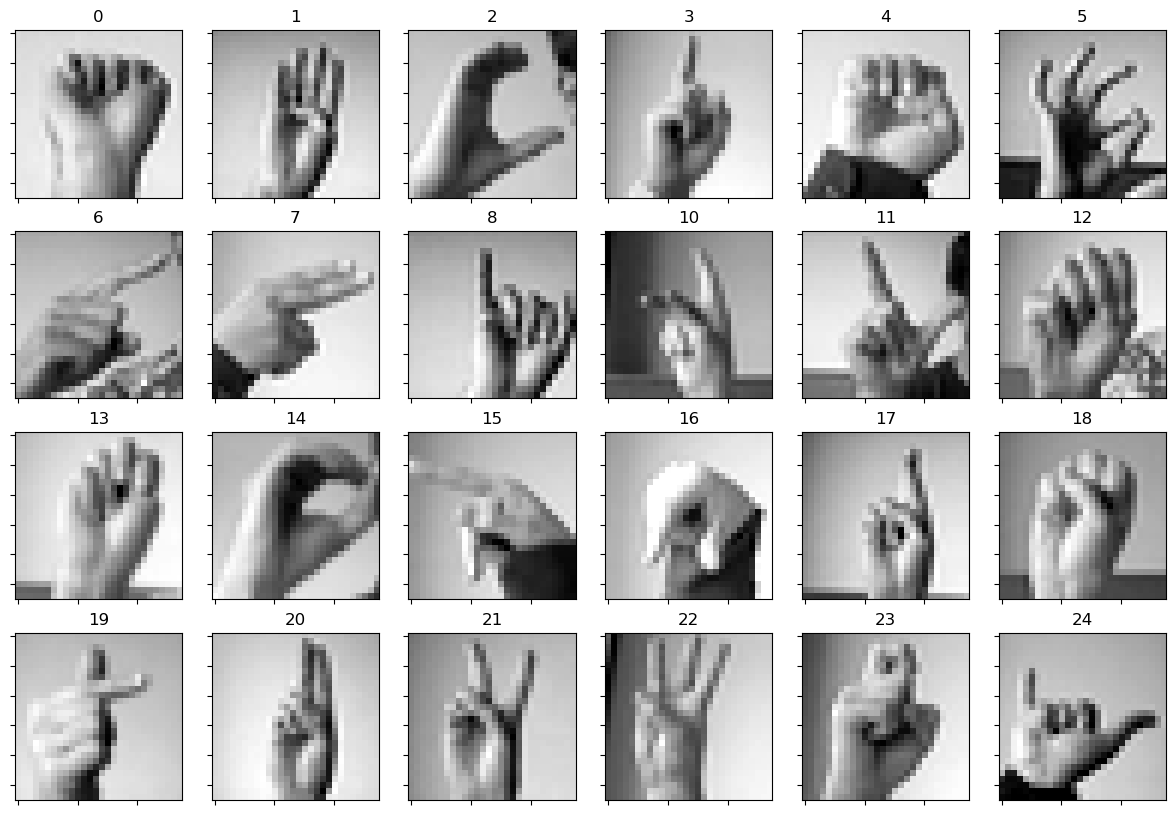

In [28]:
# Displays dataframes from the training set with their labels

labelDict = {
    "1": "A",
    "2": "B",
    "3": "C",
    "4": "D",
    "5": "E",
    "6": "F",
    "7": "G",
    "8": "H",
    "9": "I",
    "10": "K",
    "11": "L",
    "12": "M",
    "13": "N",
    "14": "O",
    "15": "P",
    "16": "Q",
    "17": "R",
    "18": "S",
    "19": "T",
    "20": "U",
    "21": "V",
    "22": "W",
    "23": "X",
    "24": "Y"
}

fig, axs = plt.subplots(4, 6, figsize=(15, 10))
fig.subplots_adjust(hspace = 0.2, wspace=.1)
axs = axs.ravel()
for i in range(24):
    idx = train[train['label']==labels[i]].index[0]
    axs[i].imshow(X_train[idx][:,:,0], cmap='gray')

    axs[i].set_title(y_train[idx].argmax())
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

In [29]:
#Scale Data

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [31]:
#Define Model

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation = "softmax"))
optimizer = RMSprop(lr=0.001,rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


epochs = 5
batch_size = 64

model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data= (X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

/root/miniconda3/envs/cs4795/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
429/429 [==============================] - 48s 110ms/step - loss: 1.1335 - accuracy: 0.6458 - val_loss: 0.2432 - val_accuracy: 0.9230
Epoch 2/5
429/429 [==============================] - 57s 134ms/step - loss: 0.0942 - accuracy: 0.9687 - val_loss: 0.1637 - val_accuracy: 0.9564
Epoch 3/5
429/429 [==============================] - 55s 129ms/step - loss: 0.0379 - accuracy: 0.9872 - val_loss: 0.1943 - val_accuracy: 0.9651
Epoch 4/5
429/429 [==============================] - 55s 128ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.2181 - val_accuracy: 0.9597
Epoch 5/5
429/429 [==============================] - 51s 118ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.1917 - val_accuracy: 0.9653


225/225 [==============================] - 4s 17ms/step
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
16
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0.]
18
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]
20
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
8
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
13
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
5


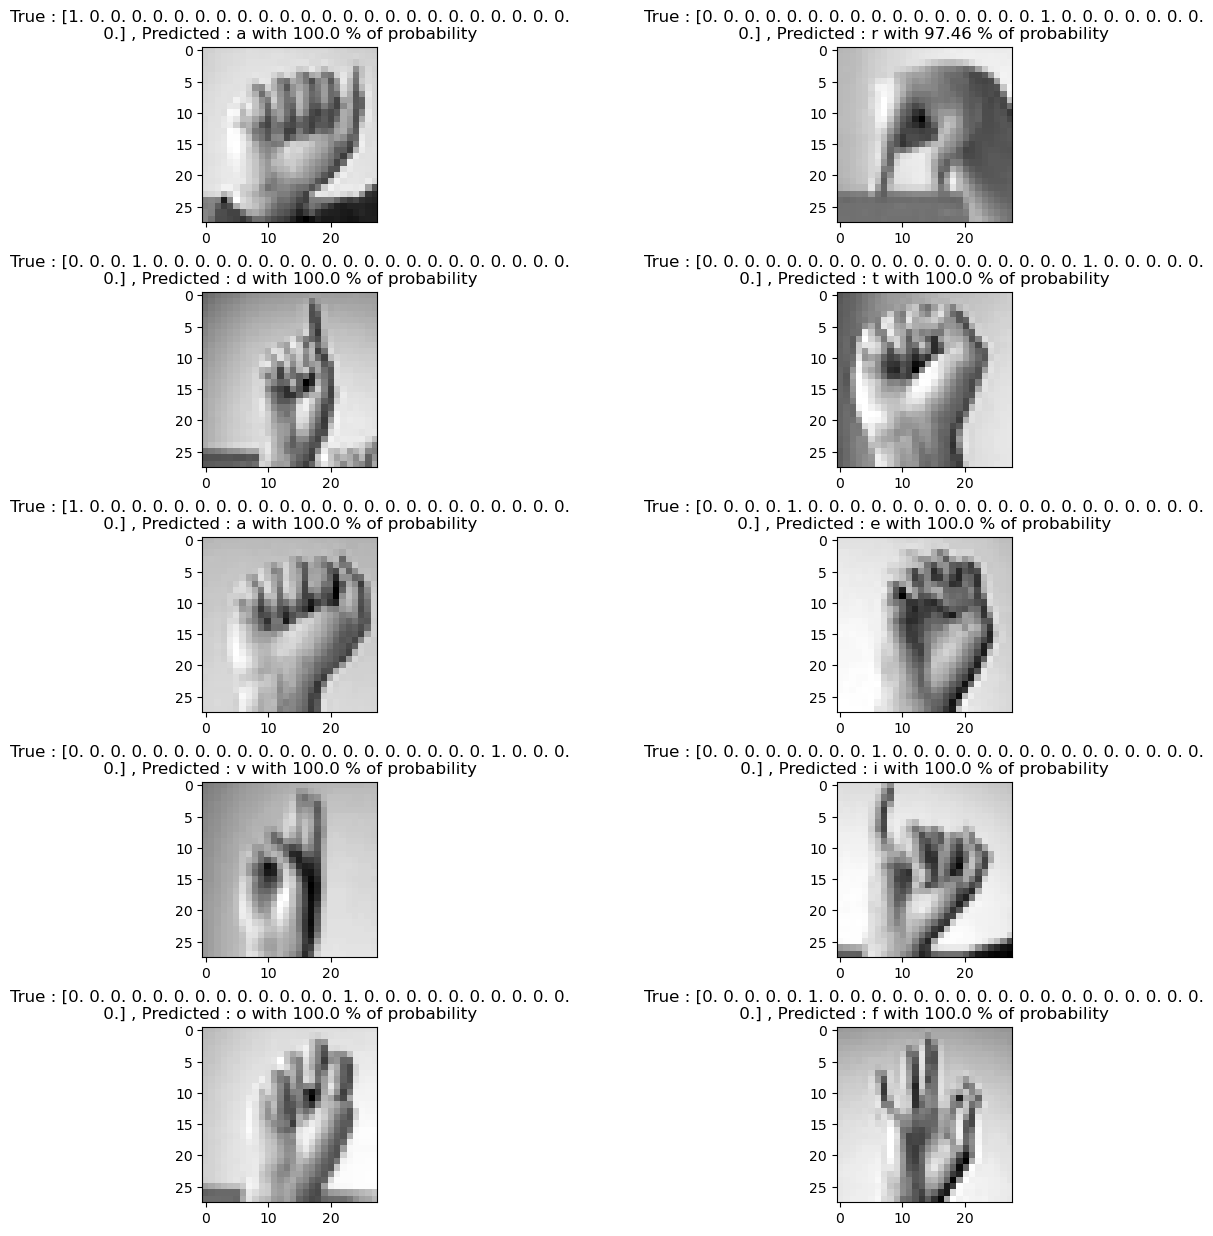

In [66]:
# uses the trained model to predict the class labels for the test data
y_pred = model.predict(X_test)

# convert the predicted and actual class labels into one-dimensional arrays of integers. 
# returns the index of the maximum value in the input array, which in this case corresponds to the predicted or actual class label.
y_pred2 = np.array([np.argmax(y_pred[i]) for i in range(len(y_pred))])
y_test2 = np.array([np.argmax(y_test[i]) for i in range(len(y_test))])

letters = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','undef']

# generates a plot of ten randomly selected test images, along with the true and predicted labels
plt.figure(figsize = (15,15))
for i in range(10):
  ind = np.random.randint(0,len(X_test))
  print(y_test[ind])
  print(y_pred2[ind])
  plt.subplot(5,2,i+1)
  plt.imshow(X_test[ind].reshape(28,28),cmap = 'gray')
  plt.title('True : {} , Predicted : {} with {} % of probability '.format(y_test[ind],
                                                                            letters[y_pred2[ind]],
                                                                            round(y_pred[ind][y_pred2[ind]]*100,2)
                                                                            ))
plt.subplots_adjust(hspace=0.4)
plt.show()